<a href="https://colab.research.google.com/github/iam-smjamilsagar/TensorFlow-and-Keras-tutorial-2/blob/main/TensorFlow%2C_and_Keras_tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
  inflating: dataset/MSR-LA - 3467.docx  
   creating: dataset/PetImages/
   creating: dataset/PetImages/Cat/
  inflating: dataset/PetImages/Cat/0.jpg  
  inflating: dataset/PetImages/Cat/1.jpg  
  inflating: dataset/PetImages/Cat/10.jpg  
  inflating: dataset/PetImages/Cat/100.jpg  
  inflating: dataset/PetImages/Cat/1000.jpg  
  inflating: dataset/PetImages/Cat/10000.jpg  
  inflating: dataset/PetImages/Cat/10006.jpg  
  inflating: dataset/PetImages/Cat/10007.jpg  
  inflating: dataset/PetImages/Cat/10008.jpg  
  inflating: dataset/PetImages/Cat/10009.jpg  
  inflating: dataset/PetImages/Cat/10010.jpg  
  inflating: dataset/PetImages/Cat/10016.jpg  
  inflating: dataset/PetImages/Cat/10017.jpg  
  inflating: dataset/PetImages/Cat/10018.jpg  
  inflating: dataset/PetImages/Cat/10019.jpg  
  inflating: dataset/PetImages/Cat/10020.jpg  
  inflating: dataset/PetImages/Cat/10026.jpg  
  inflating: dataset/PetImages/Cat/10027.jpg  
  inflating: d

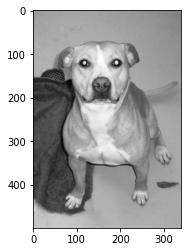

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/content/dataset/PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break

In [ ]:
print(img_array)

[[158 158 157 ... 130 130 130]
 [154 155 155 ... 129 129 129]
 [152 152 153 ... 129 129 128]
 ...
 [195 196 197 ... 170 170 170]
 [196 196 197 ... 170 170 170]
 [196 197 198 ... 169 169 169]]


In [ ]:
print(img_array.shape)

(500, 340)


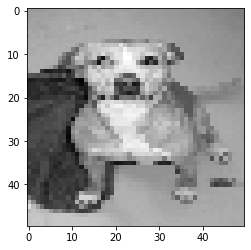

In [ ]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

print(len(training_data))

100%|██████████| 993/993 [00:01<00:00, 769.86it/s]

1989


In [ ]:
import random

random.shuffle(training_data) # shuffling the data
for sample in training_data[:10]:
    print(sample[1])

0
1
0
1
0
1
1
0
0
1


In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # reshaping the array
y = np.array(y)

[[[[101]
   [ 93]
   [ 90]
   ...
   [179]
   [191]
   [180]]

  [[ 74]
   [ 50]
   [ 34]
   ...
   [162]
   [173]
   [154]]

  [[ 86]
   [ 90]
   [ 93]
   ...
   [ 23]
   [ 22]
   [ 22]]

  ...

  [[121]
   [147]
   [162]
   ...
   [ 58]
   [100]
   [ 61]]

  [[143]
   [138]
   [153]
   ...
   [101]
   [ 92]
   [ 79]]

  [[152]
   [145]
   [153]
   ...
   [ 53]
   [125]
   [ 81]]]]


In [ ]:
import pickle

pickle_out = open("X.pickle","wb") # saving features
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb") # saving label
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb") # loading features
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb") # loading label
y = pickle.load(pickle_in)